## NLP-01

In [71]:
import nltk
import string
import docx
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.util import ngrams
from nltk import pos_tag

In [72]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ritesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [73]:
def trim_text(text):
    return text.strip()

In [74]:
def convert_case(text, to_lower=True):
    return text.lower() if to_lower else text.upper()

In [75]:
def tokenize_text(text):
    return word_tokenize(text)

In [76]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

In [77]:
def remove_punctuation(tokens):
    return [word for word in tokens if word not in string.punctuation]

In [78]:
def stem_and_lemmatize(tokens):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed = [ps.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return stemmed, lemmatized

In [79]:
def create_ngrams(tokens, n=2):
    return list(ngrams(tokens, n))

In [81]:
def load_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)


In [82]:
def count_unique_tokens(text):
    tokens = word_tokenize(text)
    return len(set(tokens))

In [83]:
def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)


In [84]:
def plot_pos_distribution(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    pos_count = Counter(tag for word, tag in pos_tags)
    plt.figure(figsize=(10, 6))
    plt.bar(pos_count.keys(), pos_count.values())
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.title('Distribution of POS Tags')
    plt.xticks(rotation=45)
    plt.show()

In [85]:
def count_unique_lemmas(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return len(set(lemmatized_tokens))

In [86]:
def plot_stopwords_distribution(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stopword_tokens = [word for word in tokens if word.lower() in stop_words]
    
    stopword_count = Counter(stopword_tokens)
    plt.figure(figsize=(15, 6))
    plt.bar(stopword_count.keys(), stopword_count.values())
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title('Distribution of Stopwords')
    plt.xticks(rotation=45)
    plt.show()

In [87]:
file_path = "New DOCX Document.docx" 

text = load_docx(file_path)


In [88]:
unique_tokens = count_unique_tokens(text)
punctuation_count = count_punctuation(text)
print("Number of unique tokens in text:", unique_tokens)
print("Number of punctuation characters:", punctuation_count)

Number of unique tokens in text: 496
Number of punctuation characters: 680


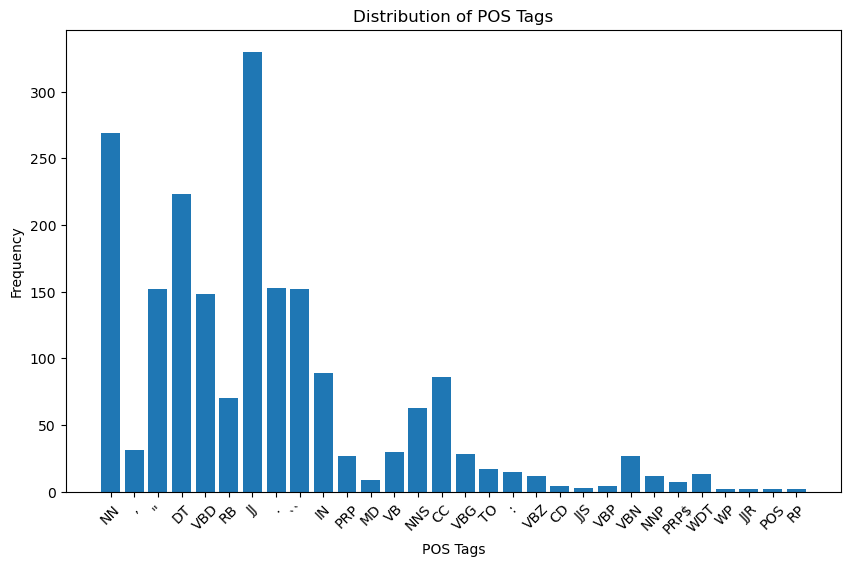

In [89]:
plot_pos_distribution(text)

In [90]:
unique_lemmas = count_unique_lemmas(text)
print("Number of unique lemmas in text:", unique_lemmas)

Number of unique lemmas in text: 487


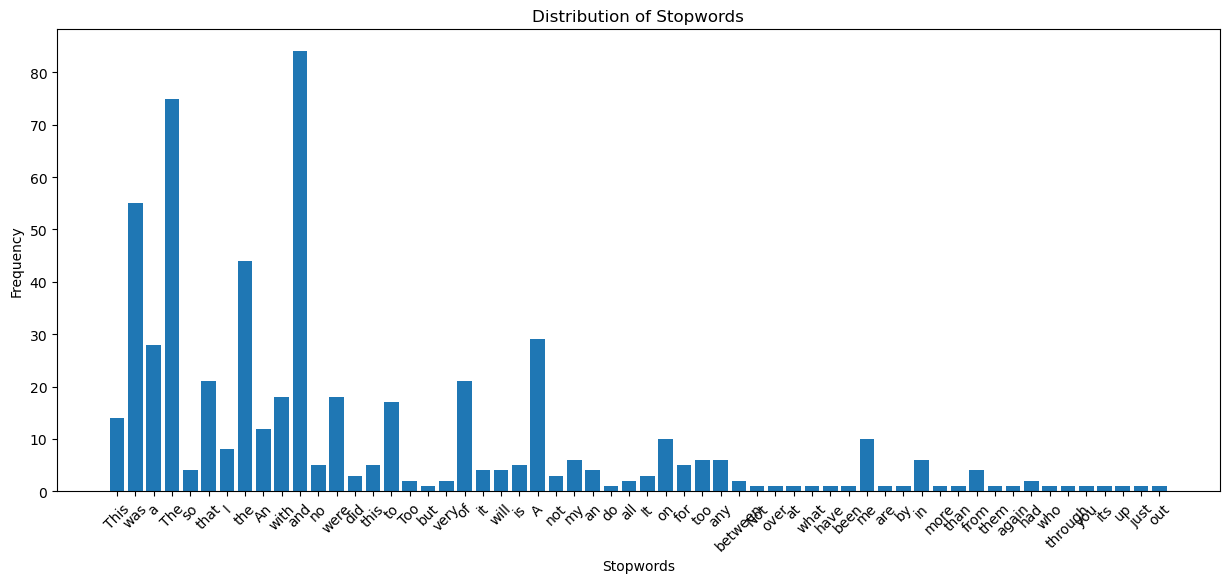

In [91]:
plot_stopwords_distribution(text)

In [94]:
text = trim_text(text)  
text_lower = convert_case(text)  
tokens = tokenize_text(text_lower)  
tokens_no_stopwords = remove_stopwords(tokens)  
tokens_no_punctuation = remove_punctuation(tokens_no_stopwords)  
stemmed_tokens, lemmatized_tokens = stem_and_lemmatize(tokens_no_punctuation)  
bigrams = create_ngrams(tokens_no_punctuation) 


In [98]:
print("Trimmed text:", text)  

Trimmed text: review,label
"This movie was absolutely wonderful, a masterpiece!",1
"The acting was so bad that I couldn't watch till the end.",0
"An engaging story with fantastic visuals and great pacing.",1
"The plot made no sense, and the characters were dull.",0
"The director did a phenomenal job bringing this to life.",1
"Too much hype but very little substance; disappointing.",0
"I loved every second of it; will definitely recommend!",1
"This is one of the worst films I've ever seen.",0
"The music score and cinematography were stunning.",1
"Awful script, bad dialogue, and poor character development.",0
"A heartwarming tale with a perfect blend of humor and drama.",1
"Boring and predictable, not worth my time.",0
"An emotional rollercoaster with top-notch performances.",1
"This movie was a waste of two hours of my life.",0
"A cinematic gem! Incredible acting and gripping plot.",1
"The editing was messy, and the pacing was painfully slow.",0
"An uplifting and inspiring story that to

In [99]:
print("Lower case text:", text_lower)  

Lower case text: review,label
"this movie was absolutely wonderful, a masterpiece!",1
"the acting was so bad that i couldn't watch till the end.",0
"an engaging story with fantastic visuals and great pacing.",1
"the plot made no sense, and the characters were dull.",0
"the director did a phenomenal job bringing this to life.",1
"too much hype but very little substance; disappointing.",0
"i loved every second of it; will definitely recommend!",1
"this is one of the worst films i've ever seen.",0
"the music score and cinematography were stunning.",1
"awful script, bad dialogue, and poor character development.",0
"a heartwarming tale with a perfect blend of humor and drama.",1
"boring and predictable, not worth my time.",0
"an emotional rollercoaster with top-notch performances.",1
"this movie was a waste of two hours of my life.",0
"a cinematic gem! incredible acting and gripping plot.",1
"the editing was messy, and the pacing was painfully slow.",0
"an uplifting and inspiring story that

In [100]:
print("Tokens:", tokens)  

Tokens: ['review', ',', 'label', "''", 'this', 'movie', 'was', 'absolutely', 'wonderful', ',', 'a', 'masterpiece', '!', '``', ',1', "''", 'the', 'acting', 'was', 'so', 'bad', 'that', 'i', 'could', "n't", 'watch', 'till', 'the', 'end', '.', '``', ',0', "''", 'an', 'engaging', 'story', 'with', 'fantastic', 'visuals', 'and', 'great', 'pacing', '.', '``', ',1', "''", 'the', 'plot', 'made', 'no', 'sense', ',', 'and', 'the', 'characters', 'were', 'dull', '.', '``', ',0', "''", 'the', 'director', 'did', 'a', 'phenomenal', 'job', 'bringing', 'this', 'to', 'life', '.', '``', ',1', "''", 'too', 'much', 'hype', 'but', 'very', 'little', 'substance', ';', 'disappointing', '.', '``', ',0', "''", 'i', 'loved', 'every', 'second', 'of', 'it', ';', 'will', 'definitely', 'recommend', '!', '``', ',1', "''", 'this', 'is', 'one', 'of', 'the', 'worst', 'films', 'i', "'ve", 'ever', 'seen', '.', '``', ',0', "''", 'the', 'music', 'score', 'and', 'cinematography', 'were', 'stunning', '.', '``', ',1', "''", 'awfu

In [101]:
print("Tokens without stopwords:", tokens_no_stopwords) 

Tokens without stopwords: ['review', ',', 'label', "''", 'movie', 'absolutely', 'wonderful', ',', 'masterpiece', '!', '``', ',1', "''", 'acting', 'bad', 'could', "n't", 'watch', 'till', 'end', '.', '``', ',0', "''", 'engaging', 'story', 'fantastic', 'visuals', 'great', 'pacing', '.', '``', ',1', "''", 'plot', 'made', 'sense', ',', 'characters', 'dull', '.', '``', ',0', "''", 'director', 'phenomenal', 'job', 'bringing', 'life', '.', '``', ',1', "''", 'much', 'hype', 'little', 'substance', ';', 'disappointing', '.', '``', ',0', "''", 'loved', 'every', 'second', ';', 'definitely', 'recommend', '!', '``', ',1', "''", 'one', 'worst', 'films', "'ve", 'ever', 'seen', '.', '``', ',0', "''", 'music', 'score', 'cinematography', 'stunning', '.', '``', ',1', "''", 'awful', 'script', ',', 'bad', 'dialogue', ',', 'poor', 'character', 'development', '.', '``', ',0', "''", 'heartwarming', 'tale', 'perfect', 'blend', 'humor', 'drama', '.', '``', ',1', "''", 'boring', 'predictable', ',', 'worth', 'time'

In [102]:
print("Tokens without punctuation:", tokens_no_punctuation)

Tokens without punctuation: ['review', 'label', "''", 'movie', 'absolutely', 'wonderful', 'masterpiece', '``', ',1', "''", 'acting', 'bad', 'could', "n't", 'watch', 'till', 'end', '``', ',0', "''", 'engaging', 'story', 'fantastic', 'visuals', 'great', 'pacing', '``', ',1', "''", 'plot', 'made', 'sense', 'characters', 'dull', '``', ',0', "''", 'director', 'phenomenal', 'job', 'bringing', 'life', '``', ',1', "''", 'much', 'hype', 'little', 'substance', 'disappointing', '``', ',0', "''", 'loved', 'every', 'second', 'definitely', 'recommend', '``', ',1', "''", 'one', 'worst', 'films', "'ve", 'ever', 'seen', '``', ',0', "''", 'music', 'score', 'cinematography', 'stunning', '``', ',1', "''", 'awful', 'script', 'bad', 'dialogue', 'poor', 'character', 'development', '``', ',0', "''", 'heartwarming', 'tale', 'perfect', 'blend', 'humor', 'drama', '``', ',1', "''", 'boring', 'predictable', 'worth', 'time', '``', ',0', "''", 'emotional', 'rollercoaster', 'top-notch', 'performances', '``', ',1', "'

In [103]:
print("Stemmed tokens:", stemmed_tokens) 

Stemmed tokens: ['review', 'label', "''", 'movi', 'absolut', 'wonder', 'masterpiec', '``', ',1', "''", 'act', 'bad', 'could', "n't", 'watch', 'till', 'end', '``', ',0', "''", 'engag', 'stori', 'fantast', 'visual', 'great', 'pace', '``', ',1', "''", 'plot', 'made', 'sens', 'charact', 'dull', '``', ',0', "''", 'director', 'phenomen', 'job', 'bring', 'life', '``', ',1', "''", 'much', 'hype', 'littl', 'substanc', 'disappoint', '``', ',0', "''", 'love', 'everi', 'second', 'definit', 'recommend', '``', ',1', "''", 'one', 'worst', 'film', "'ve", 'ever', 'seen', '``', ',0', "''", 'music', 'score', 'cinematographi', 'stun', '``', ',1', "''", 'aw', 'script', 'bad', 'dialogu', 'poor', 'charact', 'develop', '``', ',0', "''", 'heartwarm', 'tale', 'perfect', 'blend', 'humor', 'drama', '``', ',1', "''", 'bore', 'predict', 'worth', 'time', '``', ',0', "''", 'emot', 'rollercoast', 'top-notch', 'perform', '``', ',1', "''", 'movi', 'wast', 'two', 'hour', 'life', '``', ',0', "''", 'cinemat', 'gem', 'incre

In [104]:
print("Lemmatized tokens:", lemmatized_tokens) 

Lemmatized tokens: ['review', 'label', "''", 'movie', 'absolutely', 'wonderful', 'masterpiece', '``', ',1', "''", 'acting', 'bad', 'could', "n't", 'watch', 'till', 'end', '``', ',0', "''", 'engaging', 'story', 'fantastic', 'visuals', 'great', 'pacing', '``', ',1', "''", 'plot', 'made', 'sense', 'character', 'dull', '``', ',0', "''", 'director', 'phenomenal', 'job', 'bringing', 'life', '``', ',1', "''", 'much', 'hype', 'little', 'substance', 'disappointing', '``', ',0', "''", 'loved', 'every', 'second', 'definitely', 'recommend', '``', ',1', "''", 'one', 'worst', 'film', "'ve", 'ever', 'seen', '``', ',0', "''", 'music', 'score', 'cinematography', 'stunning', '``', ',1', "''", 'awful', 'script', 'bad', 'dialogue', 'poor', 'character', 'development', '``', ',0', "''", 'heartwarming', 'tale', 'perfect', 'blend', 'humor', 'drama', '``', ',1', "''", 'boring', 'predictable', 'worth', 'time', '``', ',0', "''", 'emotional', 'rollercoaster', 'top-notch', 'performance', '``', ',1', "''", 'movie',

In [105]:
print("Bigrams:", bigrams) 

Bigrams: [('review', 'label'), ('label', "''"), ("''", 'movie'), ('movie', 'absolutely'), ('absolutely', 'wonderful'), ('wonderful', 'masterpiece'), ('masterpiece', '``'), ('``', ',1'), (',1', "''"), ("''", 'acting'), ('acting', 'bad'), ('bad', 'could'), ('could', "n't"), ("n't", 'watch'), ('watch', 'till'), ('till', 'end'), ('end', '``'), ('``', ',0'), (',0', "''"), ("''", 'engaging'), ('engaging', 'story'), ('story', 'fantastic'), ('fantastic', 'visuals'), ('visuals', 'great'), ('great', 'pacing'), ('pacing', '``'), ('``', ',1'), (',1', "''"), ("''", 'plot'), ('plot', 'made'), ('made', 'sense'), ('sense', 'characters'), ('characters', 'dull'), ('dull', '``'), ('``', ',0'), (',0', "''"), ("''", 'director'), ('director', 'phenomenal'), ('phenomenal', 'job'), ('job', 'bringing'), ('bringing', 'life'), ('life', '``'), ('``', ',1'), (',1', "''"), ("''", 'much'), ('much', 'hype'), ('hype', 'little'), ('little', 'substance'), ('substance', 'disappointing'), ('disappointing', '``'), ('``', '